To implement an image segmentation system using unsupervised learning (K-Means clustering) that overlays detected object regions on the original image, simulating an Augmented Reality (AR) visualization of clustered objects.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


--2025-07-26 19:30:22--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82429 (80K) [image/jpeg]
Saving to: ‘fruits.jpg’

fruits.jpg          100%[===================>]  80.50K  --.-KB/s    in 0.02s   

2025-07-26 19:30:23 (3.41 MB/s) - ‘fruits.jpg’ saved [82429/82429]



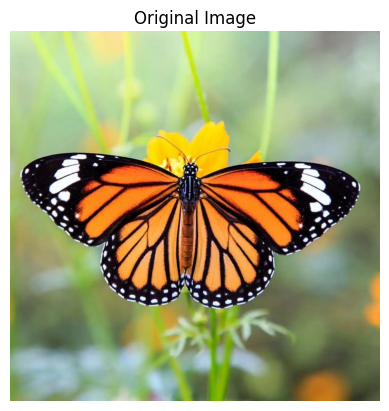

In [2]:
# Download and load sample image
!wget -O fruits.jpg https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg

# Read the image
img = cv2.imread('Butterfly.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()


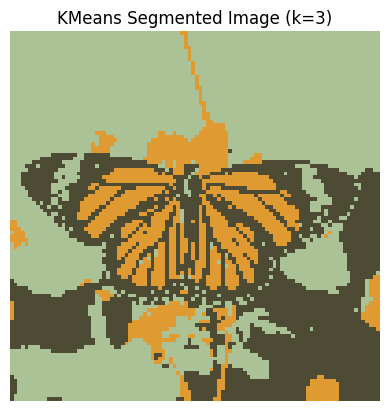

In [3]:
# Resizing for faster computation
img_small = cv2.resize(img_rgb, (100, 100))

# Reshaping image to a 2D array of pixels
pixel_values = img_small.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixel_values)

# Get labels and clustered centers
labels = kmeans.labels_
centers = np.uint8(kmeans.cluster_centers_)

# Map each pixel to the cluster center
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape(img_small.shape)

plt.imshow(segmented_image)
plt.title(f"KMeans Segmented Image (k={k})")
plt.axis('off')
plt.show()


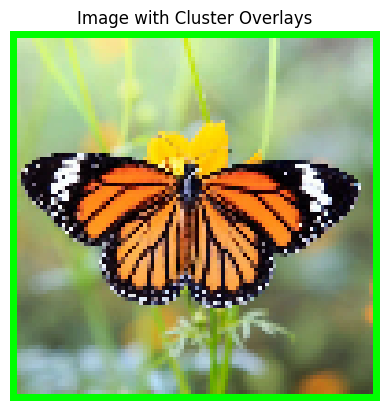

In [4]:
# Convert the clustered image to grayscale for contour detection
gray = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2GRAY)

# Apply threshold to get binary image
_, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find the contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the resized original image
img_contour = img_small.copy()
cv2.drawContours(img_contour, contours, -1, (0,255,0), 2)

plt.imshow(img_contour)
plt.title("Image with Cluster Overlays")
plt.axis('off')
plt.show()


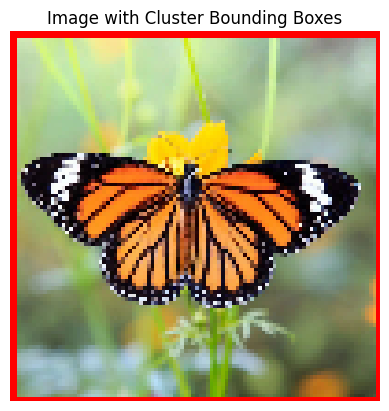

In [5]:
# Draw bounding boxes around contours
img_boxes = img_small.copy()
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img_boxes, (x, y), (x+w, y+h), (255,0,0), 2)

plt.imshow(img_boxes)
plt.title("Image with Cluster Bounding Boxes")
plt.axis('off')
plt.show()
